# **18CSC312 : DATA VISUALISATION**

**PROJECT REVIEW - FINAL**


> NAME :  A S NAVEENA

> REG. NO. : CB.SC.I5DAS18024


Topic : INDIAN CRIME ANALYSIS

Source of Dataset : https://www.kaggle.com/shishir349/indian-crime-analysis   

 File Name : crimes.csv

In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 282kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# reading the dataset
df_crimes = pd.read_csv("/content/sample_data/crimes.csv")

In [ ]:
# replacing misspelt column name "Pupose" with "Purpose"
df_crimes.rename(columns={"Pupose" : "Purpose"}, inplace=True)
df_crimes

,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawaful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5864,Puducherry,2012,Others,8,2,4,1,1,0,0,0,0,0,0,0,0,3,5,8


In [ ]:
df_crimes.shape

(5866, 19)

In [ ]:
df_crimes.columns

Index(['STATE/UT', 'YEAR', 'Purpose', 'Total No. of cases reported',
       'Male upto 10 years', 'Female upto 10 years', 'Male 10-15 years',
       'Female 10-15 years', 'Male 15-18 years', 'Female 15-18 years',
       'Male 18-30 years', 'Female 18-30 years', 'Male 30-50 years',
       'Female 30-50 years', 'Male above 50 years', 'Female above 50 years',
       'Total Male', 'Total Female', 'Grand Total'],
      dtype='object')

In [ ]:
df_crimes.Purpose.unique()

array(['For Adoption', 'For Begging', 'For Camel racing',
       'For Illicit intercourse', 'For marriage', 'For Prostitution',
       'For Ransom', 'For Revenge', 'For Sale', 'For Selling body parts',
       'For Slavery', 'For unlawaful activity', 'Others', 'Total',
       'For unlawful activity'], dtype=object)

In [ ]:
# replacing misspelt row value "unlawaful" with "unlawful"
df_crimes.loc[(df_crimes.Purpose == 'For unlawaful activity'),'Purpose'] = 'For unlawful activity'
df_crimes.Purpose.unique()

array(['For Adoption', 'For Begging', 'For Camel racing',
       'For Illicit intercourse', 'For marriage', 'For Prostitution',
       'For Ransom', 'For Revenge', 'For Sale', 'For Selling body parts',
       'For Slavery', 'For unlawful activity', 'Others', 'Total'],
      dtype=object)

In [ ]:
# dataframe excluding the "total" row with cumulative sum
df_actual = df_crimes.drop(df_crimes[df_crimes['Purpose'] == 'Total'].index)
df_actual

,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,Andhra Pradesh,2001,For Adoption,8,3,1,0,0,0,0,0,4,0,0,0,0,3,5,8
1,Andhra Pradesh,2001,For Begging,2,0,0,2,0,0,0,0,0,0,0,0,0,2,0,2
2,Andhra Pradesh,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Andhra Pradesh,2001,For Illicit intercourse,78,0,2,0,25,0,24,0,25,0,2,0,0,0,78,78
4,Andhra Pradesh,2001,For marriage,339,0,0,0,73,1,164,6,91,0,4,0,0,7,332,339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860,Puducherry,2012,For Sale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5861,Puducherry,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5862,Puducherry,2012,For Slavery,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5863,Puducherry,2012,For unlawful activity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# dataframe with cumulative sum for each state after each year
df_total = df_crimes.loc[df_crimes['Purpose'] == 'Total']
df_total

,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
13,Andhra Pradesh,2001,Total,1182,17,6,12,105,64,265,218,348,121,25,5,0,437,749,1186
27,Andhra Pradesh,2002,Total,1302,7,4,4,38,2,31,297,721,125,51,13,9,448,854,1302
41,Andhra Pradesh,2003,Total,1485,16,10,34,84,48,181,298,518,139,138,19,0,554,931,1485
55,Andhra Pradesh,2004,Total,1526,33,23,33,113,45,183,193,581,164,122,28,14,496,1036,1532
69,Andhra Pradesh,2005,Total,1612,24,20,25,95,24,163,305,617,221,90,20,15,619,1000,1619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,Puducherry,2008,Total,17,4,0,1,3,0,6,1,0,1,0,1,0,8,9,17
5823,Puducherry,2009,Total,18,1,1,0,1,0,8,3,2,1,1,0,0,5,13,18
5837,Puducherry,2010,Total,17,2,3,0,2,0,5,1,6,1,0,0,0,4,16,20
5851,Puducherry,2011,Total,12,1,1,0,0,0,5,1,2,1,1,0,0,3,9,12


In [ ]:
# dataframe grouped state/UT
df_grouped = df_total.groupby(by=['STATE/UT'], as_index=False).sum()
df_grouped = df_grouped.drop(['YEAR'], axis=1)
df_grouped.head()

,STATE/UT,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
0,A&N Islands,94,2,5,5,13,2,47,3,10,8,4,0,0,20,79,99
1,Andhra Pradesh,21239,252,269,236,1498,293,3431,3267,8170,2150,1405,253,102,6451,14875,21326
2,Arunachal Pradesh,857,0,3,12,96,0,23,212,419,74,17,1,0,299,558,857
3,Assam,27939,2,8,21,75,124,615,2886,15864,1563,6710,18,53,4614,23325,27939
4,Bihar,37220,217,30,374,478,859,6160,12151,11539,4304,768,376,3,18281,18978,37259


# **1) Give an overall visualisation of the total crimes committed in all the states/UT**

_Bar Graph using plotly_

In [ ]:
fig = px.bar(df_grouped, x = "STATE/UT", y = "Grand Total", hover_data = ["Total Male", "Total Female"])
fig

INFERENCE : Uttar Pradesh leads, followed by Bihar. Union Territories have the least number of cases, followed by states like Mizoram and Sikkim.

# **2) Which gender is most involved in crimes?**

_Grouped Bar Chart using plotly_

In [ ]:
data = [go.Bar(name="Male", x=df_grouped['STATE/UT'], y=df_grouped['Total Male']),
        go.Bar(name="Female", x=df_grouped['STATE/UT'], y=df_grouped['Total Female'])]
layout = go.Layout(title="TOTAL MALES V/S FEMALES INVOLVED IN CRIMES OVER 2001-2012 (STATE WISE)", yaxis_title="Number of Issues", xaxis_title="State/UT")
fig = go.Figure(data = data, layout = layout)
fig.show()

INFERENCE : Females were more involved in crimes compared to men. They lead the most in Uttar Pradesh, followed by Rajasthan and Assam. Gender difference is not so relevant in states like Bihar and Tripura.

_Line Graph using matplotlib_

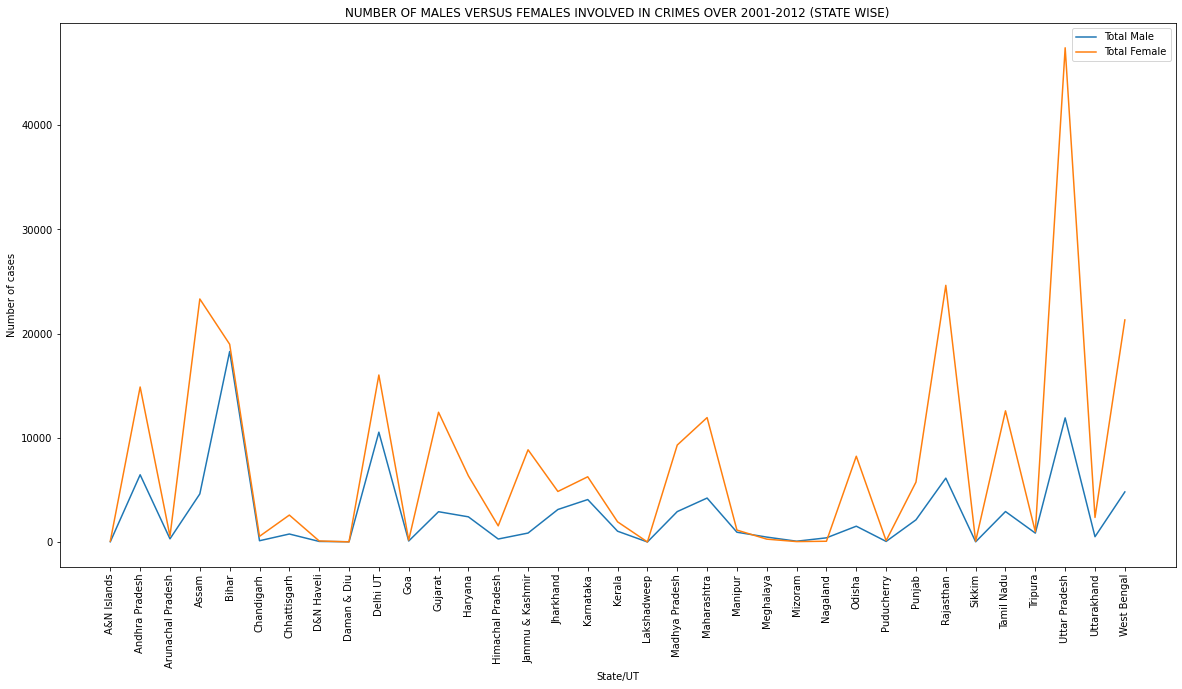

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_grouped['STATE/UT'], df_grouped['Total Male'], label='Male')
plt.plot(df_grouped['STATE/UT'], df_grouped['Total Female'], label='Female')
plt.legend(["Total Male", "Total Female"])
plt.xticks(rotation=90)
plt.xlabel("State/UT")
plt.ylabel("Number of cases")
plt.title("NUMBER OF MALES VERSUS FEMALES INVOLVED IN CRIMES OVER 2001-2012 (STATE WISE)")
plt.show()

# **3) Visualise the crimes in top 10 safest states to live in**

_Bar Graph using matplotlib_

In [ ]:
best10 = df_grouped.sort_values(by='Grand Total').head(10)

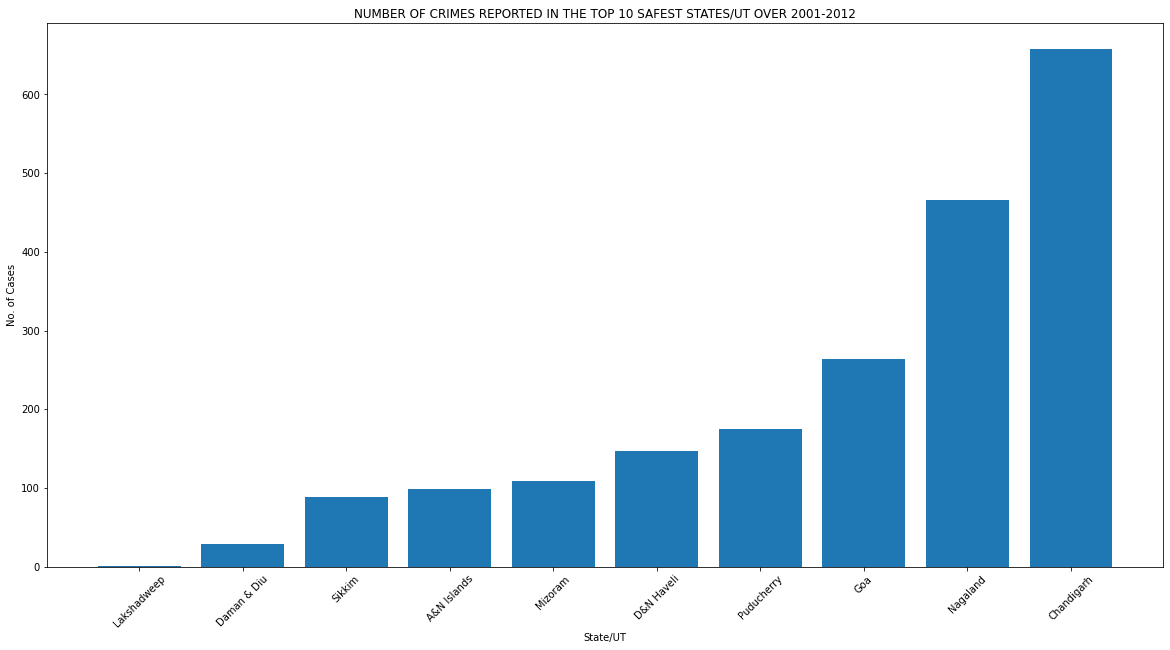

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(best10['STATE/UT'], best10['Grand Total'])
plt.title("NUMBER OF CRIMES REPORTED IN THE TOP 10 SAFEST STATES/UT OVER 2001-2012")
plt.xlabel("State/UT")
plt.ylabel("No. of Cases")
plt.xticks(rotation=45)
plt.show()

INFERENCE : The top 10 safest states/UT are Lakshadweep, Daman & Diu, Sikkim, Andaman & Nicobar Islands, Mizoram, Dadra & Nagar Haveli, Puducherry, Goa, Nagaland, & Chandigarh. Safest Union Territory is Lakshadweep, and state is Sikkim.

# **4) Which age (& gender) group got involved in the most crimes in Kerala in 2010?**

_Pie Chart using matplotlib_


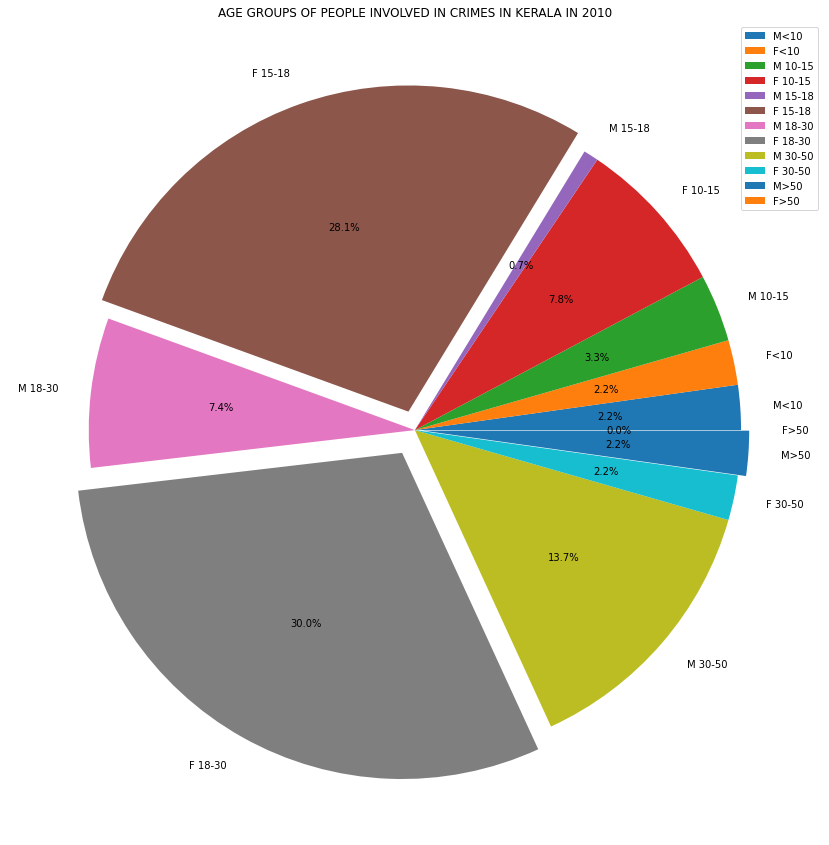

In [ ]:
df_kerala = df_total.loc[df_total["STATE/UT"] == "Kerala"]
df_refined = df_kerala.loc[df_kerala["YEAR"] == 2010].iloc[:,4:-3]
array = np.array(df_refined.transpose()).ravel()
label = ['M<10', 'F<10', 'M 10-15', 'F 10-15', 'M 15-18', 'F 15-18', 'M 18-30', 'F 18-30', 'M 30-50', 'F 30-50', 'M>50', 'F>50']
exp = (0, 0, 0, 0, 0, 0.06, 0, 0.08, 0, 0, 0.025, 0.025)
plt.figure(figsize=(15,15))
plt.pie(array, labels = label, autopct='%1.1f%%', explode = exp)
plt.title("AGE GROUPS OF PEOPLE INVOLVED IN CRIMES IN KERALA IN 2010")
plt.legend(label)
plt.show()

INFERENCE : Females are the most involved. The age group of 18-30 tops with 30%, followed by those in age group 15-18 (28.1%). Among males, highest involved are those from age group 30-50 (13.7%)

# **5) Which crime was committed the most in 2001?**

_Horizontal Bar Graph using matplotlib_


In [ ]:
df_2001 = df_crimes.loc[df_crimes['YEAR'] == 2001].groupby(by=['Purpose'], as_index=False).sum()
df_2001.drop(columns=['YEAR'], inplace=True)
df_2001.drop(df_2001.tail(1).index, inplace=True)

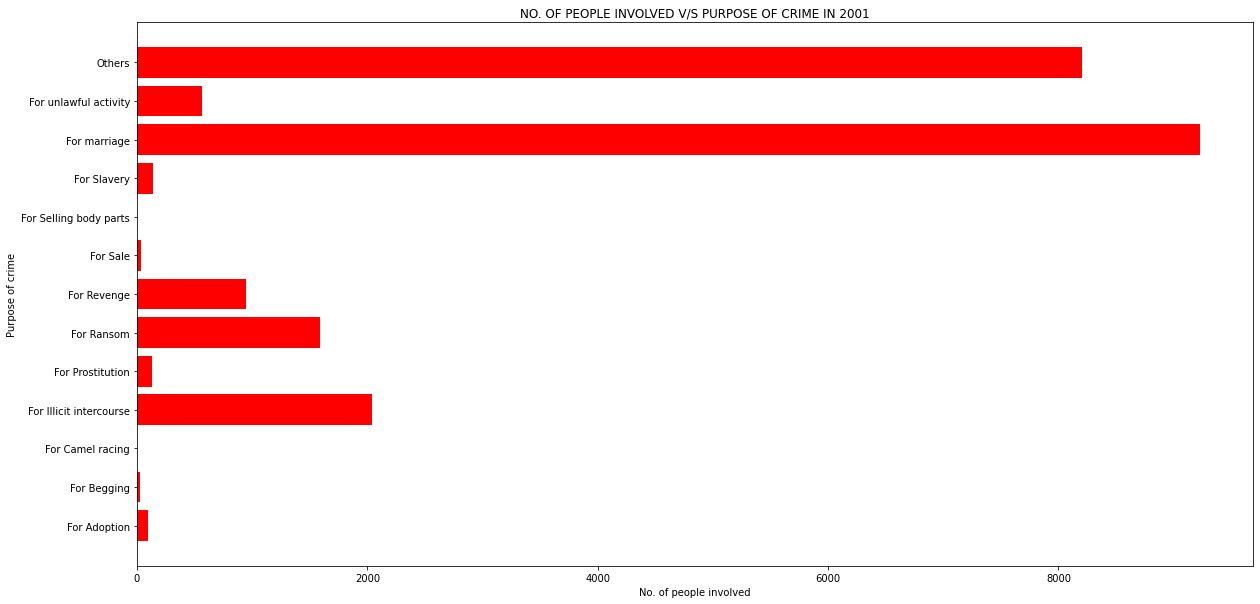

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(df_2001['Purpose'], df_2001['Grand Total'], color='r')
plt.xlabel("No. of people involved")
plt.ylabel("Purpose of crime")
plt.title("NO. OF PEOPLE INVOLVED V/S PURPOSE OF CRIME IN 2001")
plt.show()

INFERENCE : crimes for marriage was committed the most, followed by a collective group of crimes for other purposes. This was followed by crimes related to illicit intercourse. The least share belongs to crimes related to camel racing and selling body parts.

# **6) What is the trend of all crimes commited in Gujarat over the years?**

_Treemap using plotly_


In [ ]:
df_guj = df_actual[df_actual["STATE/UT"] == "Gujarat"]
df_guj.drop(columns=['STATE/UT'], inplace=True)
df_guj

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
1008,2001,For Adoption,3,0,1,0,0,0,0,0,2,0,0,0,0,0,3,3
1009,2001,For Begging,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,2001,For Camel racing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1011,2001,For Illicit intercourse,141,0,2,3,19,5,62,5,42,0,3,0,0,13,128,141
1012,2001,For marriage,652,0,3,0,108,14,329,31,160,6,2,0,0,51,602,653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,2012,For Sale,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1171,2012,For Selling body parts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1172,2012,For Slavery,2,0,0,0,0,0,0,2,0,0,0,0,0,2,0,2
1173,2012,For unlawful activity,60,0,0,0,0,5,46,0,3,2,2,2,0,9,51,60


In [ ]:
fig = px.treemap(df_guj, path=['YEAR', 'Purpose'], values='Grand Total', color = 'Purpose')
fig.show()

INFERENCE : The size of the rectangles imply that the number of crimes has increased over time. But throughout, the crimes related to marriage contributed the most, followed by the collective group of other crimes and illicit intercourse switching between the second and third highest. In 2007 there were only 5 different crimes reported (minimum) but in 2009 this was 11 (maximum).


# **7) Which year recorded the most number of crimes?**

_Line Graph using plotly_

In [ ]:
df_years = df_crimes.groupby(by=['YEAR'], as_index=False).sum()
df_years = df_years.iloc[:,0:2]
df_years

,YEAR,Total No. of cases reported
0,2001,44964
1,2002,43700
2,2003,39984
3,2004,46654
4,2005,45664
5,2006,47982
6,2007,55122
7,2008,60522
8,2009,67720
9,2010,76880


In [ ]:
fig = go.Figure(data=go.Scatter(x=df_years.iloc[:,0], y=df_years.iloc[:,1]))
fig.update_layout(title='YEAR WISE TOTAL CRIMES REPORTED',
                   xaxis_title='Year',
                   yaxis_title='Count')
fig.show()

INFERENCE : The slope of the line has been increasing constantly since 2005, and is at the highest peak in the year 2012 with 95,184 cases reported. It was least in 2003 with 39,984 cases.

# **8) Analyse the trend in crimes related to marriage, illicit intercourse, ransom in the decade (2001-2010)**

_Stacked Barchart using plotly_

In [ ]:
df_decade = df_actual.loc[df_actual['YEAR'] <= 2010]
df_decade = df_decade.loc[df_decade['Purpose'].isin(['For marriage', 'For Illicit intercourse', 'For Ransom'])]

In [ ]:
fig = px.bar(df_decade, x="YEAR", y="Grand Total", color="Purpose", hover_data=["STATE/UT"])
fig.update_layout(title='TRENDS IN CRIMES RELATED TO MARRIAGE, ILLICIT INTERCOURSE, AND RANSOM OVER THE DECADE', xaxis_title='Year', yaxis_title='Count')
fig.show()

INFERENCE : Throughout the decade, crimes related to marriages was committed the most, followed by illicit intercourse. In marriages and illicit intercourse crimes, Uttar Pradesh tops the list. While in crimes for ransom, Bihar is the highest.

# **9) Range of number of females involved in marriage related crimes in the year 2009?**

_Boxplot using matplotlib_

In [ ]:
df_females = df_crimes.iloc[:,[0,1,2,5,7,9,11,13,15,17,18]]
df_females = df_females.loc[(df_females["YEAR"] == 2009) & (df_females["Purpose"] == "For marriage")]
df_females.head()

,STATE/UT,YEAR,Purpose,Female upto 10 years,Female 10-15 years,Female 15-18 years,Female 18-30 years,Female 30-50 years,Female above 50 years,Total Female,Grand Total
116,Andhra Pradesh,2009,For marriage,0,13,318,361,1,0,693,722
284,Arunachal Pradesh,2009,For marriage,0,1,0,18,0,0,19,19
452,Assam,2009,For marriage,0,0,0,845,750,0,1595,1595
620,Bihar,2009,For marriage,0,84,322,1335,58,0,1799,1863
788,Chhattisgarh,2009,For marriage,22,9,8,19,0,0,58,58


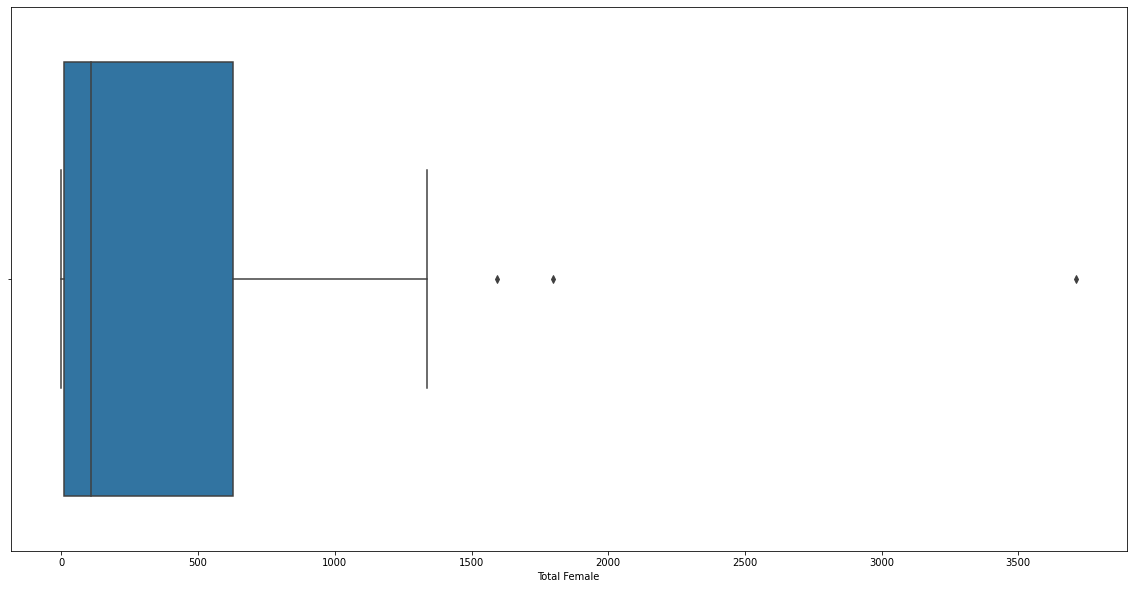

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x = df_females['Total Female'])

INFERENCE : Most states have a total in the range 0-650. There are two states with count between 1500 and 2000, and only 1 with greater than 3500. This shows that in 2009, there were states with 0 cases related to marriages, as well as three states with significantly higher number of crimes related to marriages compared to the rest.

# **10) Analyse the state-wise male v/s female trend in crimes in South India (Kerala, Tamil Nadu, Karnataka, Andhra Pradesh)**

_Scatterplot using plotly_

In [ ]:
df_south = df_total.loc[df_total['STATE/UT'].isin(["Kerala", "Tamil Nadu", "Karnataka", "Andhra Pradesh"])]
fig = px.scatter(df_south, x="Total Male", y="Total Female", color="YEAR", facet_col="STATE/UT")
fig.show()

INFERENCE : Kerala has the least cases, Andhra Pradesh the most. In Andhra, the count of both males and females involved has increased, whereas in Tamil Nadu, there was a rapid increase in number of females involved, but not males. We do not see any significant rise in either of the genders in the case of Kerala.

# **11) Visualise the range of males and females involved in crimes in South India (Kerala, Tamil Nadu, Karnataka, Andhra Pradesh)**

_Scatterplot + Marginal Boxplot using plotly_

In [ ]:
fig = px.scatter(df_south, x='Total Male', y='Total Female', color='YEAR', marginal_x='box', marginal_y='box', hover_data=['STATE/UT'])
fig.show()

INFERENCE : Distribution of males is in the range (69,731) with majority in the range (133,461), and that of females is in the range (88,1773) with majority in range (262,1139). On average, males = 260 and females = 697. The scale of x and y axes itself explains that the number of women involved is much higher.

# **12) Variation across age of females involved in crimes in North East India**

_Parallel Coordinates Plot using plotly_

In [ ]:
df_females_ne = df_total
northeast = ['Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura', 'Sikkim']
df_females_ne = df_females_ne.loc[df_females_ne["STATE/UT"].isin(northeast)]
df_females_ne.head()

,STATE/UT,YEAR,Purpose,Total No. of cases reported,Male upto 10 years,Female upto 10 years,Male 10-15 years,Female 10-15 years,Male 15-18 years,Female 15-18 years,Male 18-30 years,Female 18-30 years,Male 30-50 years,Female 30-50 years,Male above 50 years,Female above 50 years,Total Male,Total Female,Grand Total
181,Arunachal Pradesh,2001,Total,83,0,0,0,0,0,0,16,51,12,4,0,0,28,55,83
195,Arunachal Pradesh,2002,Total,57,0,0,0,0,0,3,19,34,0,1,0,0,19,38,57
209,Arunachal Pradesh,2003,Total,68,0,0,1,8,0,0,16,43,0,0,0,0,17,51,68
223,Arunachal Pradesh,2004,Total,65,0,0,0,8,0,0,18,33,6,0,0,0,24,41,65
237,Arunachal Pradesh,2005,Total,58,0,0,4,6,0,2,14,30,1,1,0,0,19,39,58


In [ ]:
# non-numeric values need to be mapped to numeric form inorder to do a parallel coordinate plot
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_females_ne['Encoded STATE/UT'] = le.fit_transform(df_females_ne['STATE/UT'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(df_females_ne['STATE/UT'].unique())
print(df_females_ne['Encoded STATE/UT'].unique())

['Arunachal Pradesh' 'Assam' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Sikkim' 'Tripura']
[0 1 2 3 4 5 6 7]


In [ ]:
dim = ['Female upto 10 years', 'Female 10-15 years', 'Female 15-18 years', 'Female 18-30 years', 'Female 30-50 years', 'Female above 50 years']
fig = px.parallel_coordinates(df_females_ne, color = 'Encoded STATE/UT', dimensions=dim)
fig.show()

INFERENCE : In females upto the age of 18, almost all states have a significant number of cases. Above the age of 18, Tripura, Sikkim and Nagaland have very less number of cases. Major contributors in this age group are from Arunachal Pradesh, Assam and Manipur. In females upto 10 years, Tripura is the highest. The axes of each age group gives us the conclusion that age group 18-30 has the most number of cases, and upto 10 has the least.

# **13) Trends in number of minor females (<18 years, age group wise) involved in crimes in the North Eastern states of India**

_Scatter Matrix using plotly_


In [ ]:
dim = ['Female upto 10 years', 'Female 10-15 years', 'Female 15-18 years']
fig = px.scatter_matrix(df_females_ne, dimensions = dim, color = 'STATE/UT', hover_data=['YEAR'])
fig.show()

INFERENCE : There is no linear relationship between the different age groups. By analysing the scales we can say that age 15-18 is most involved, with a maximum value of 451. Tripura and Assam stand out from the rest with the highest cases in all groups.

# **14) Analyse the trends in the purpose of crimes in 2011 and 2012?**

_Sunburst Chart using plotly_


In [ ]:
df_new = df_actual[df_actual["YEAR"] > 2010]
fig = px.sunburst(df_new, path=['YEAR','Purpose'], values="Grand Total")
fig.show()

INFERENCE : 2012 recorded a higher number of crimes than 2011 with marriage, others, and illicit intercourse being the purpose of crime (in that order).

# **15) Which crime tops the chart?**

_Donut Chart using plotly_

In [ ]:
df_new = df_actual.groupby(by="Purpose", as_index=False).sum()
fig = go.Figure(data=[go.Pie(labels = df_new["Purpose"], values = df_new["Grand Total"], hole = 0.4)])
fig.show()

INFERENCE : On overall, marriage crimes are the highest (45.9%) followed by the group of crimes for other purposes (36.4%) and illicit intercourse (8.32%). The least committed crime is for selling body parts (0.0047%).

# **16) Analyse the range of the total number of cases in a year**

_Boxplot using plotly_


In [ ]:
py.iplot([go.Box(y=df_years["Total No. of cases reported"],name="Total Cases")])

INFERENCE : Atleast 39,384 and atmost 95,184 crimes were reported per year. It was mostly between 45,314 and 72,300. The distribution is skewed towards the minimum side, with a median of 51,552.

# **17) Which crimes occur the most? Visualise with the words.**

_Word Cloud using wordcloud_

In [ ]:
dictionary = {}
for purpose, total in df_new.iloc[:,[0,-1]].values:
    dictionary[purpose] = total

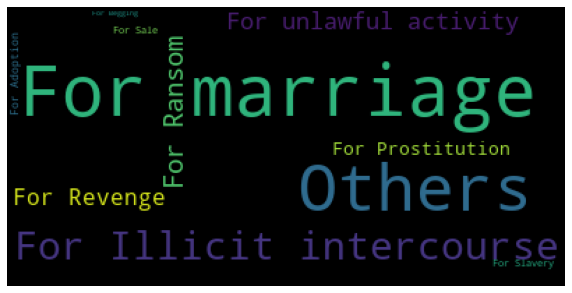

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(frequencies = dictionary)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

INFERENCE : The size of the words implies the frequency of occurance of those crimes. As seen previously, marriage crimes are the highest, followed by other purposes and illicit intercourse. Crimes for begging is the least significant by vision which implies that its frequency was the least.

# **18) Analyse the range of number of males belonging to different age groups involved in crimes**

_Subplots of Boxplots using plotly_

In [ ]:
trace0 = go.Box(y=df_total["Male upto 10 years"],name="<10")
trace1 = go.Box(y=df_total["Male 10-15 years"],name="10-15")
trace2 = go.Box(y=df_total["Male 15-18 years"],name="15-18")
trace3 = go.Box(y=df_total["Male 18-30 years"],name="18-30")
trace4 = go.Box(y=df_total["Male 30-50 years"],name="30-50")
trace5 = go.Box(y=df_total["Male above 50 years"],name=">50")
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(title="AGE-GROUP WISE ANALYSIS OF MALES INVOLVED IN CRIMES", xaxis=dict(title="Age Groups"), yaxis=dict(title="Count"))
fig = go.Figure(layout = layout, data = data)
py.iplot(fig)

INFERENCE : Boxplot of the age group 18-30 is the most spread, and that of >50 is the least spread. Since it is a common scale, we can say that the number of crimes was spread the most and the least for the same age groups. Males of age 18-30 is followed by the age group 30-50, with regard to the number of crimes they are involved in.

# **19) Total male and female count ratio**

_Stacked Area Chart / Line Plot using matplotlib_

In [ ]:
df_MF_year = df_crimes.groupby(by=['YEAR']).sum()
df_MF_year = df_MF_year.iloc[:,[-3,-2,-1]]
df_MF_year

,Total Male,Total Female,Grand Total
YEAR,,,
2001,15824,30168,45992
2002,14882,29464,44346
2003,13434,26608,40042
2004,15274,31344,46618
2005,15038,31228,46266
2006,13490,35094,48584
2007,14680,41380,56060
2008,14844,46346,61190
2009,16234,52374,68608


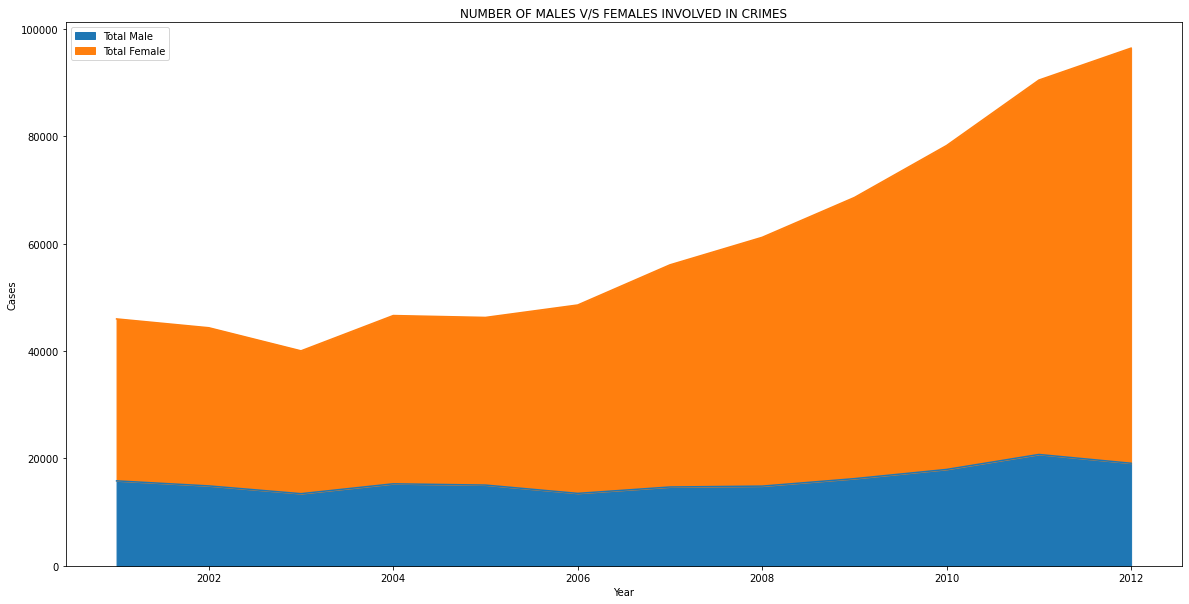

In [ ]:
df_MF_year.iloc[:,:-1].plot.area(stacked=True, figsize=(20,10))
plt.xlabel("Year")
plt.ylabel("Cases")
plt.title("NUMBER OF MALES V/S FEMALES INVOLVED IN CRIMES")
plt.show()

INFERENCE : Females are visibly more involved than males since the area covered by their category is more, in the chart. Towards the end (2012) we can say that the crimes involving females was about 4 times that of males, which was less than 3 times in the beginning (2001).

# **20) Analyse the total crime rate difference in the beginning (2001) v/s the end (2012)**

_Violin Plot using matplotlib_

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



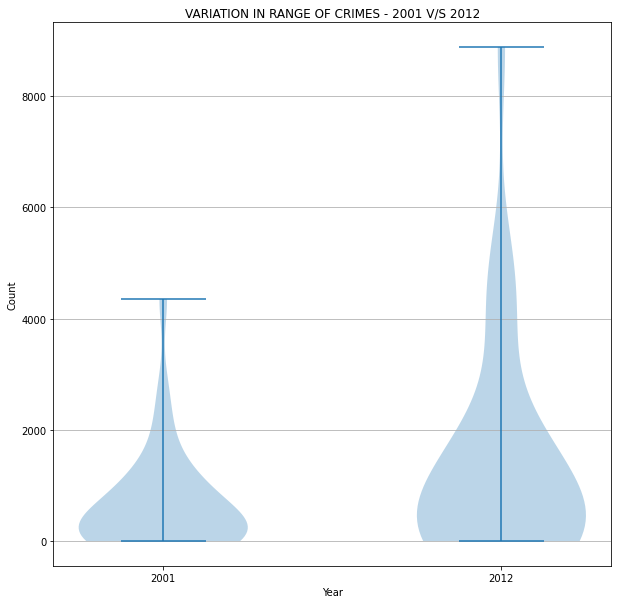

In [ ]:
data = [df_total[df_total["YEAR"] == 2001]["Grand Total"].values,
        df_total[df_total["YEAR"] == 2012]["Grand Total"].values]
fig, axes = plt.subplots(figsize=(10,10))
axes.violinplot(dataset = data)
axes.set_title('VARIATION IN RANGE OF CRIMES - 2001 V/S 2012')
axes.yaxis.grid(True)
axes.set_xlabel('Year')
axes.set_ylabel('Count')
axes.set_xticks([1,2])
axes.set_xticklabels([2001, 2012])
plt.show()

INFERENCE : In 2001, the probability spread was limited to a small value (<< 2000), towards the bottom of the plot. But in 2012, this width started flattening and reaching up to 6000. The maximum has risen from ~4000 to ~8000. This implies an immense hike in the total number of crimes over the years 2001-2012. 